# Customer EDA

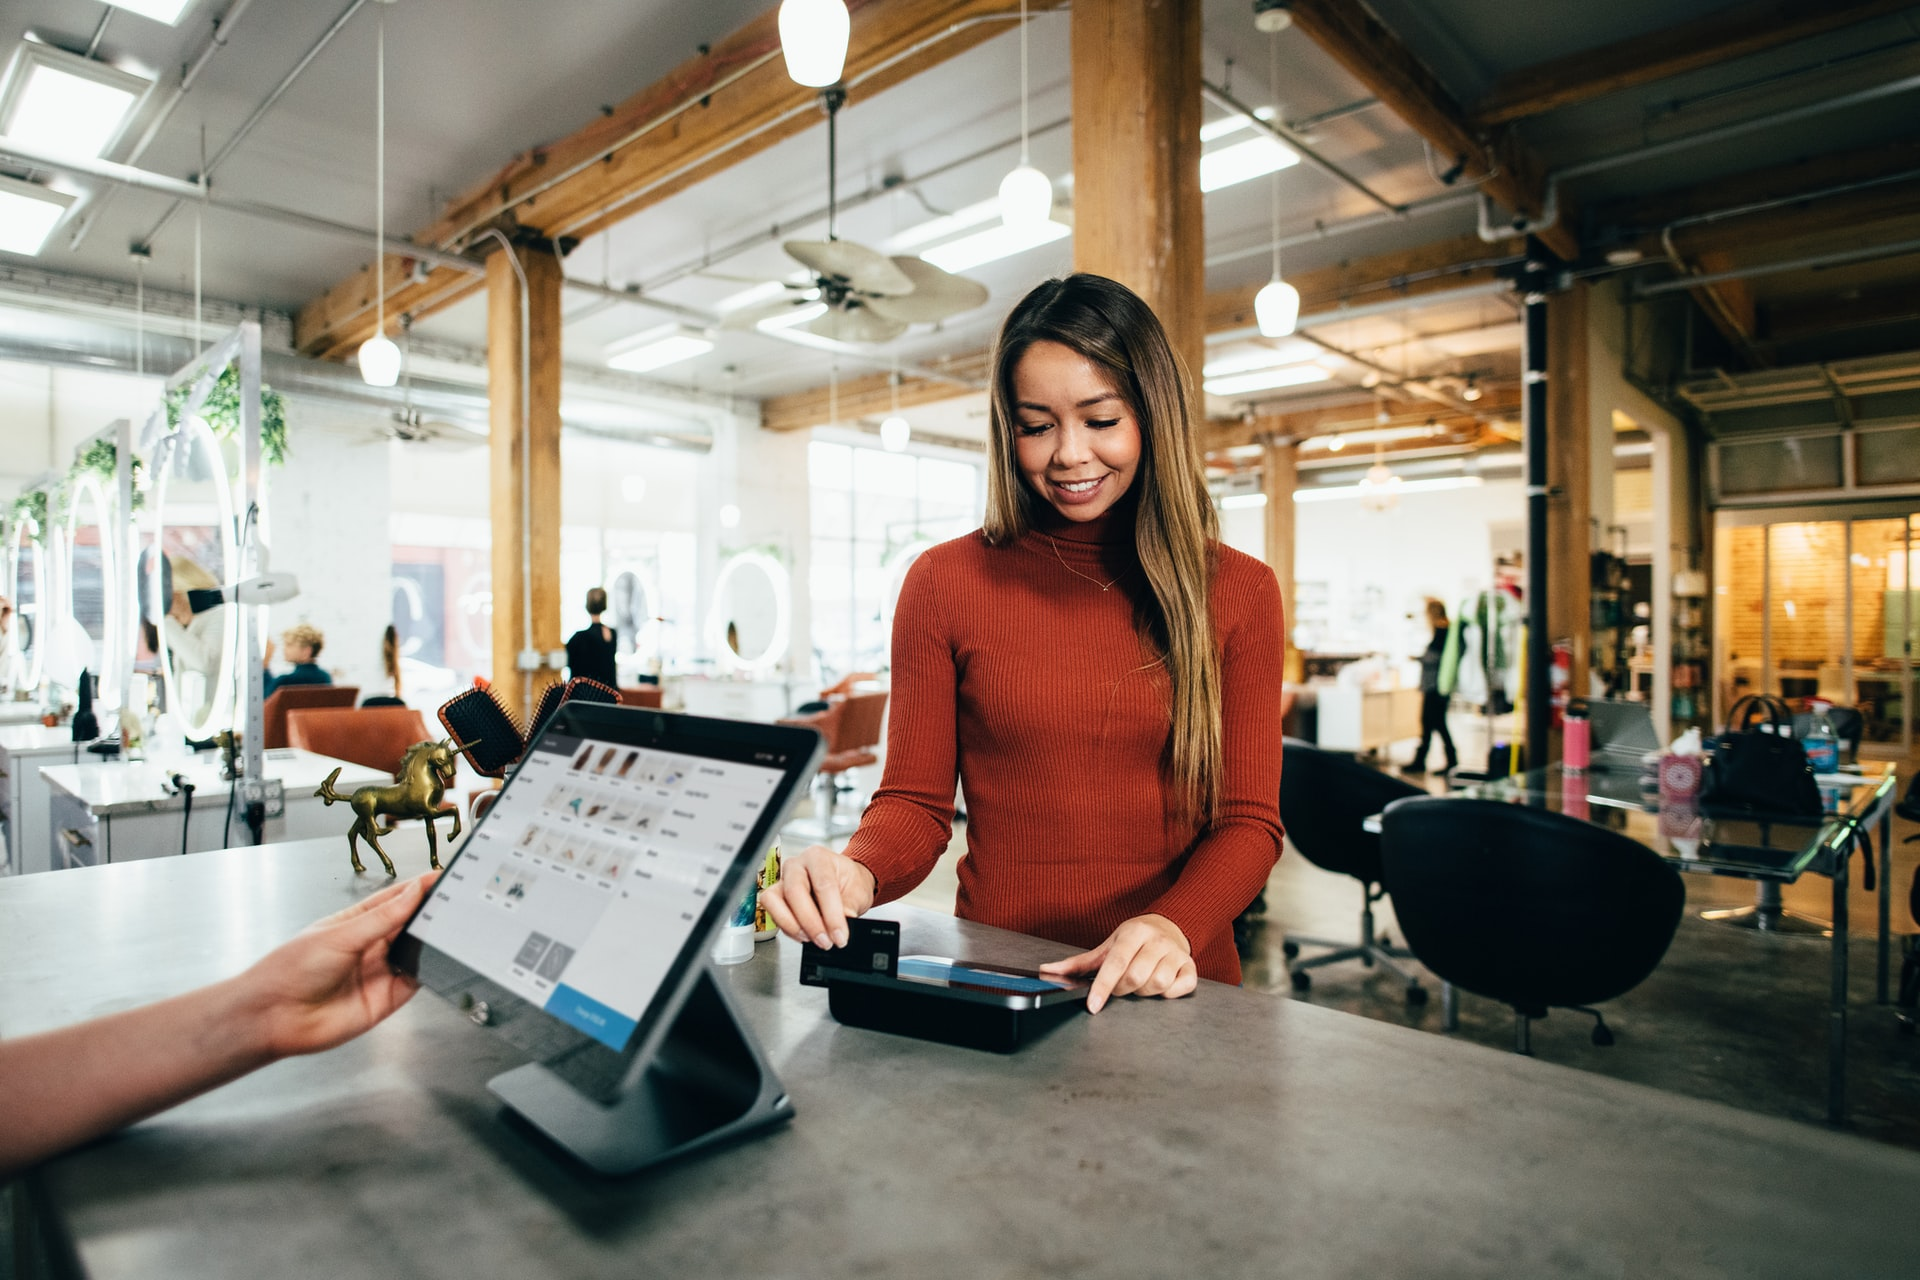

Photo by Blake Wisz on Unsplash

## Import Library

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Guiding Problem

1. What are the demographics of the Customer?
2. What are the spending habit by their demographic?

## Loading Data

In [2]:
data = pd.read_csv("data_marketing_campaign.csv", sep = '\t')
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

From above info I gather that:
- There are missing value in `Income` column
- `Dt_Customer`, which is Date of customer's enrollment with the company, data type should be parsed into datetime

First, I'm going to remove the 24 rows with the missing value

In [5]:
data = data.dropna()
print(data.shape)
data.sample(3)

(2216, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2103,2909,1974,PhD,Married,78128.0,0,1,19-02-2014,89,934,...,3,0,1,1,0,0,0,3,11,0
1916,2326,1990,Graduation,Married,18929.0,0,0,16-02-2013,15,32,...,6,0,0,0,0,0,0,3,11,0
1619,3298,1956,Master,Married,52973.0,0,1,08-11-2012,92,856,...,8,0,0,0,0,0,0,3,11,0


Next, I'm going to parse `Dt_Customer` dtype to datetime

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer'].dtype

dtype('<M8[ns]')

In [7]:
print(f"The range of Dt_Customer is from {min(data['Dt_Customer'])} to {max(data['Dt_Customer'])}")

The range of Dt_Customer is from 2012-01-08 00:00:00 to 2014-12-06 00:00:00


In [8]:
#Unique Value of the Categorical Column

print(f"Education:\n{data['Education'].value_counts()}\n")
print(f"Marital_Status:\n{data['Marital_Status'].value_counts()}")

Education:
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Marital_Status:
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


### Here is the summary of what I'm going to do:
- Rename some of the following category in `Education`:
    - Graduation --> Graduate
    - Basic & 2n Cycle --> Undergraduate
- Rename some of the following category in `Marital Status`:
    - Married & Together --> In Relationship
    - Divorced, Widow, Alone, Absurd, YOLO --> Single
- Rename the following columns:
    - Marital_Status --> Relationship_Status
    - MntWines --> PrdWines
    - MntFruits --> PrdFruits
    - MntMeatProducts --> PrdMeat
    - MntFishProducts --> PrdFish
    - MntSweetProducts --> PrdSweet
    - MntGoldProds --> PrdGold (Prd means Product)
    - NumWebPurchases --> PlcWeb
    - NumCatalogPurchases --> PlcCatalog
    - NumStorePurchases --> PlcStore (Plc means Place)
    - NumDealsPurchases --> DiscPurchase
    - NumWebVisitsMonth --> WebVisit
- Add a column `Age` by substracting 2014 - Year_Birth. I substract with 2014 because the data max Dt_Customer is on 2014 
- Add a column `Children` = Kidhome + Teenhome
- Add a column `Is_Parent` with 1 = yes and 0 = no
- Add a column `Total_Spend` = PrdWines + PrdFruits + PrdMeat + PrdFish + PrdSweet + PrdGold
- Drop the following columns:
    - ID
    - Year_Birth
    - Kidhome
    - Teenhome
    - Dt_Customer
    - Recency
    - Response
    - Z_CostContact
    - Z_Revenue 

In [9]:
# renaming categories
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Single','Alone':'Single','Married':'In Relationship','Together':'In Relationship','Absurd':'Single',
                                                       'Widow':'Single','YOLO':'Single'})
data['Education']=data['Education'].replace({'Graduation':'Graduate', 'Basic':'Undergraduate', '2n Cycle':'Undergraduate'})


#rename columns 
data=data.rename(columns={'MntWines': 'PrdWines','MntFruits':'PrdFruits','MntMeatProducts':'PrdMeat','MntFishProducts':'PrdFish','MntSweetProducts':'PrdSweet',
                          'MntGoldProds':'PrdGold', 'NumWebPurchases':'PlcWeb', 'NumCatalogPurchases':'PlcCatalog', 'NumStorePurchases':'PlcStore', 'NumDealsPurchases':'DiscPurchase',
                         'NumWebVisitsMonth':'WebVisit', 'Marital_Status':'Relationship_Status'})

#add columns
data['Age'] = 2014 - data['Year_Birth']
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)
data['Total_Spent'] = data['PrdWines'] + data['PrdFruits'] + data['PrdMeat'] + data['PrdFish'] + data['PrdSweet'] + data['PrdGold']


#drop column
data_to_drop = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Response', 'Z_CostContact', 'Z_Revenue']
data = data.drop(data_to_drop, axis = 1)
data.sample(3)

,Education,Relationship_Status,Income,PrdWines,PrdFruits,PrdMeat,PrdFish,PrdSweet,PrdGold,DiscPurchase,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,Is_Parent,Total_Spent
2175,PhD,In Relationship,79174.0,1074,37,518,193,92,129,1,...,0,0,1,1,0,0,39,0,0,2043
862,Graduate,In Relationship,7500.0,0,2,3,4,1,5,1,...,0,0,0,0,0,0,27,0,0,15
1357,PhD,Single,62159.0,182,17,259,77,70,29,1,...,0,0,0,0,0,0,68,0,0,634


## Dealing with Outliers

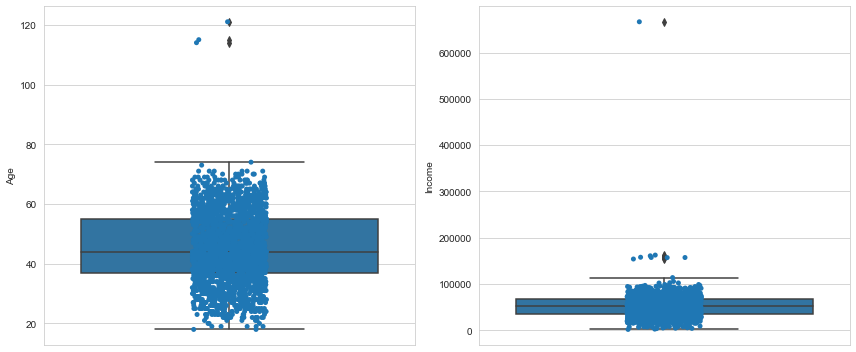

In [10]:
#Showing outliers
#sns.set(font_scale = 2)
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


ax1 = sns.boxplot(y='Age',data=data, ax = axes[0])
ax1 = sns.stripplot(y="Age", data=data, ax = axes[0])

ax2 = sns.boxplot(y='Income',data=data, ax = axes[1])
ax2 = sns.stripplot(y="Income", data=data, ax = axes[1])

fig.tight_layout()

In [11]:
#Removing the outliers
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
data.shape


(2212, 24)

After cleaning, the entries are left with 2,212 rows and 24 columns

## Descriptive Statistics

In [12]:
with pd.option_context('display.max_columns', 40):
    print(data.describe(include='all'))

       Education Relationship_Status         Income     PrdWines    PrdFruits  \
count       2212                2212    2212.000000  2212.000000  2212.000000   
unique         4                   2            NaN          NaN          NaN   
top     Graduate     In Relationship            NaN          NaN          NaN   
freq        1115                1428            NaN          NaN          NaN   
mean         NaN                 NaN   51958.810579   305.287523    26.329566   
std          NaN                 NaN   21527.278844   337.322940    39.744052   
min          NaN                 NaN    1730.000000     0.000000     0.000000   
25%          NaN                 NaN   35233.500000    24.000000     2.000000   
50%          NaN                 NaN   51371.000000   175.500000     8.000000   
75%          NaN                 NaN   68487.000000   505.000000    33.000000   
max          NaN                 NaN  162397.000000  1493.000000   199.000000   

            PrdMeat      Pr

### Summary
From above info, I conclude that:
1. Customers average spent are \$607.26  
2. Customers average income are \$51,958.81
3. Customers average age are 45.

## Analysis

### Customer Demographic

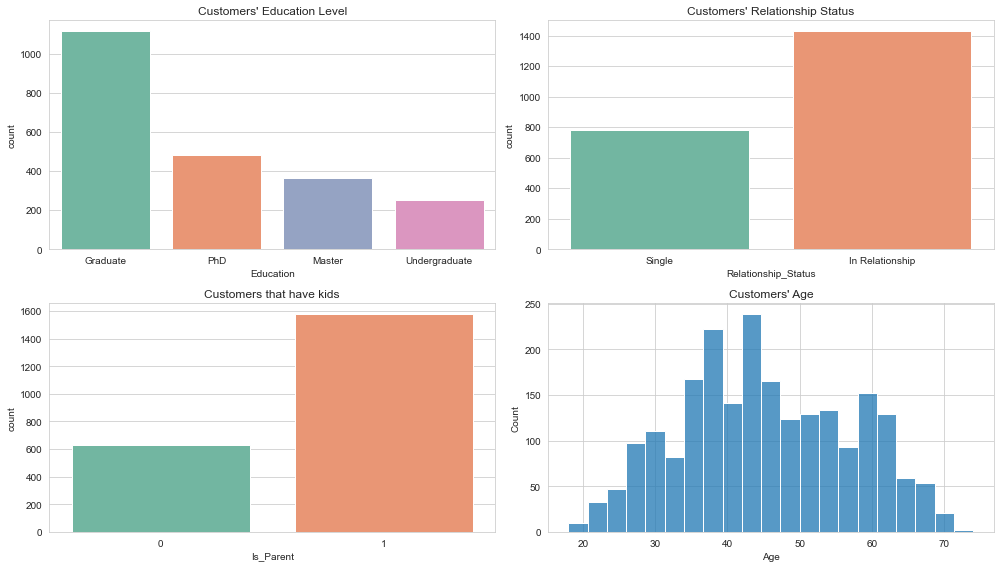

In [14]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

#sns.set(font_scale = 2)

ax1 = sns.countplot(data=data, x='Education', ax = axes[0,0], palette = ("Set2"))
ax1.set(title = "Customers' Education Level")

ax2 = sns.countplot(data=data, x='Relationship_Status', ax = axes[0,1], palette = ("Set2"))
ax2.set(title = "Customers' Relationship Status")

ax3 = sns.countplot(data=data, x='Is_Parent', ax = axes[1,0], palette = ("Set2"))
ax3.set(title = "Customers that have kids")

ax4 = sns.histplot(data=data, x='Age', ax = axes[1,1], palette = ("Set2"))
ax4.set(title = "Customers' Age")

fig.tight_layout()

The majority of customers's have graduate degree, are in relationship, have at least one child and between 40 - 50 years old.

### Consumer Spending by demographic

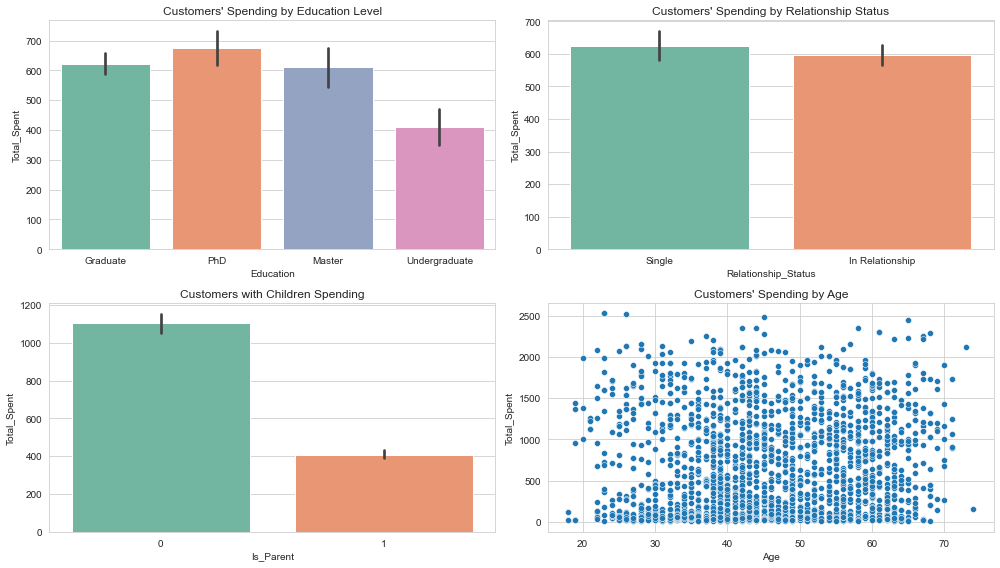

In [15]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

#sns.set(font_scale = 2)

ax1 = sns.barplot(data=data, x='Education', y='Total_Spent', ax = axes[0,0], palette = ("Set2"))
ax1.set(title = "Customers' Spending by Education Level")

ax2 = sns.barplot(data=data, x='Relationship_Status', y='Total_Spent',ax = axes[0,1], palette = ("Set2"))
ax2.set(title = "Customers' Spending by Relationship Status")

ax3 = sns.barplot(data=data, x='Is_Parent', y='Total_Spent', ax = axes[1,0], palette = ("Set2"))
ax3.set(title = "Customers with Children Spending")

ax4 = sns.scatterplot(data=data, y="Total_Spent", x="Age", ax = axes[1,1], palette = ("Set2"))
ax4.set(title = "Customers' Spending by Age")

fig.tight_layout()

1. Customer who spend the most money has a PhD degree followed by Graduate degree holder
2. Customer who are either single or in a relationship spend almost the same amount of money with single customer spend slightly more
3. Customer who is single spend significantly more.
4. Customer spending by age is inconclusive.

### Customer Response to Campaign

In [26]:
print(data.loc[data.AcceptedCmp1 == 1, 'AcceptedCmp1'].value_counts())
print(data.loc[data.AcceptedCmp2 == 1, 'AcceptedCmp2'].value_counts())
print(data.loc[data.AcceptedCmp3 == 1, 'AcceptedCmp3'].value_counts())
print(data.loc[data.AcceptedCmp4 == 1, 'AcceptedCmp4'].value_counts())
print(data.loc[data.AcceptedCmp5 == 1, 'AcceptedCmp5'].value_counts())

1    142
Name: AcceptedCmp1, dtype: int64
1    30
Name: AcceptedCmp2, dtype: int64
1    163
Name: AcceptedCmp3, dtype: int64
1    164
Name: AcceptedCmp4, dtype: int64
1    161
Name: AcceptedCmp5, dtype: int64


In [31]:
series = data.loc[data.AcceptedCmp1 == 1, 'AcceptedCmp1'].value_counts()
series[1]

142